In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

[]

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Exploratory data analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[52 53 70 61 62]
41

sex
[1 0]
2

cp
[0 1 2 3]
4

trestbps
[125 140 145 148 138]
49

chol
[212 203 174 294 248]
152

fbs
[0 1]
2

restecg
[1 0 2]
3

thalach
[168 155 125 161 106]
91

exang
[0 1]
2

oldpeak
[1.  3.1 2.6 0.  1.9]
40

slope
[2 0 1]
3

ca
[2 0 1 3 4]
5

thal
[3 2 1 0]
4

target
[0 1]
2



In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Distribution of `target` variable (disease)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64

percentage:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


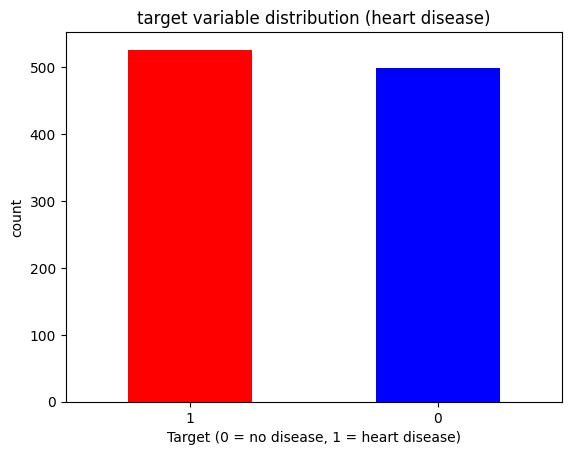

In [11]:
print("Target variable distribution:")
print(df['target'].value_counts())
print("\npercentage:")
print(df['target'].value_counts(normalize=True) * 100)

df['target'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('target variable distribution (heart disease)')
plt.xlabel('Target (0 = no disease, 1 = heart disease)')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

Checking for missing values

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✅ No missing data - ready for modeling

In [13]:
# Identify numerical and categorical columns
numerical_cols = [
        'age', 
        'trestbps', # resting blood pressure
        'chol',     # serum cholestoral in mg/dl
        'thalach',  # maximum heart rate achieved 
        'oldpeak'   # ST depression induced by exercise relative to rest
        ]

categorical_cols = [
        'sex',      # 0 = female, 1 = male
        'cp',       # chest pain type (4 values)
        'fbs',      # fasting blood sugar > 120 mg/dl
        'restecg',  # resting electrocardiographic results (values 0,1,2)
        'exang',    # exercise induced angina
        'slope',    # ST depression - measures exercise-induced changes (0 = Upsloping, 1 = Flat, 2 = Downsloping)
        'ca',       # number of major vessels (0-3) colored by flourosopy
        'thal'      # Thalassemia is a blood condition that affects how well your blood can carry oxygen around your body. But in this heart disease dataset, doctors are actually looking at how this affects blood flow to your heart specifically.
        ]


### Numerical feature analyzis

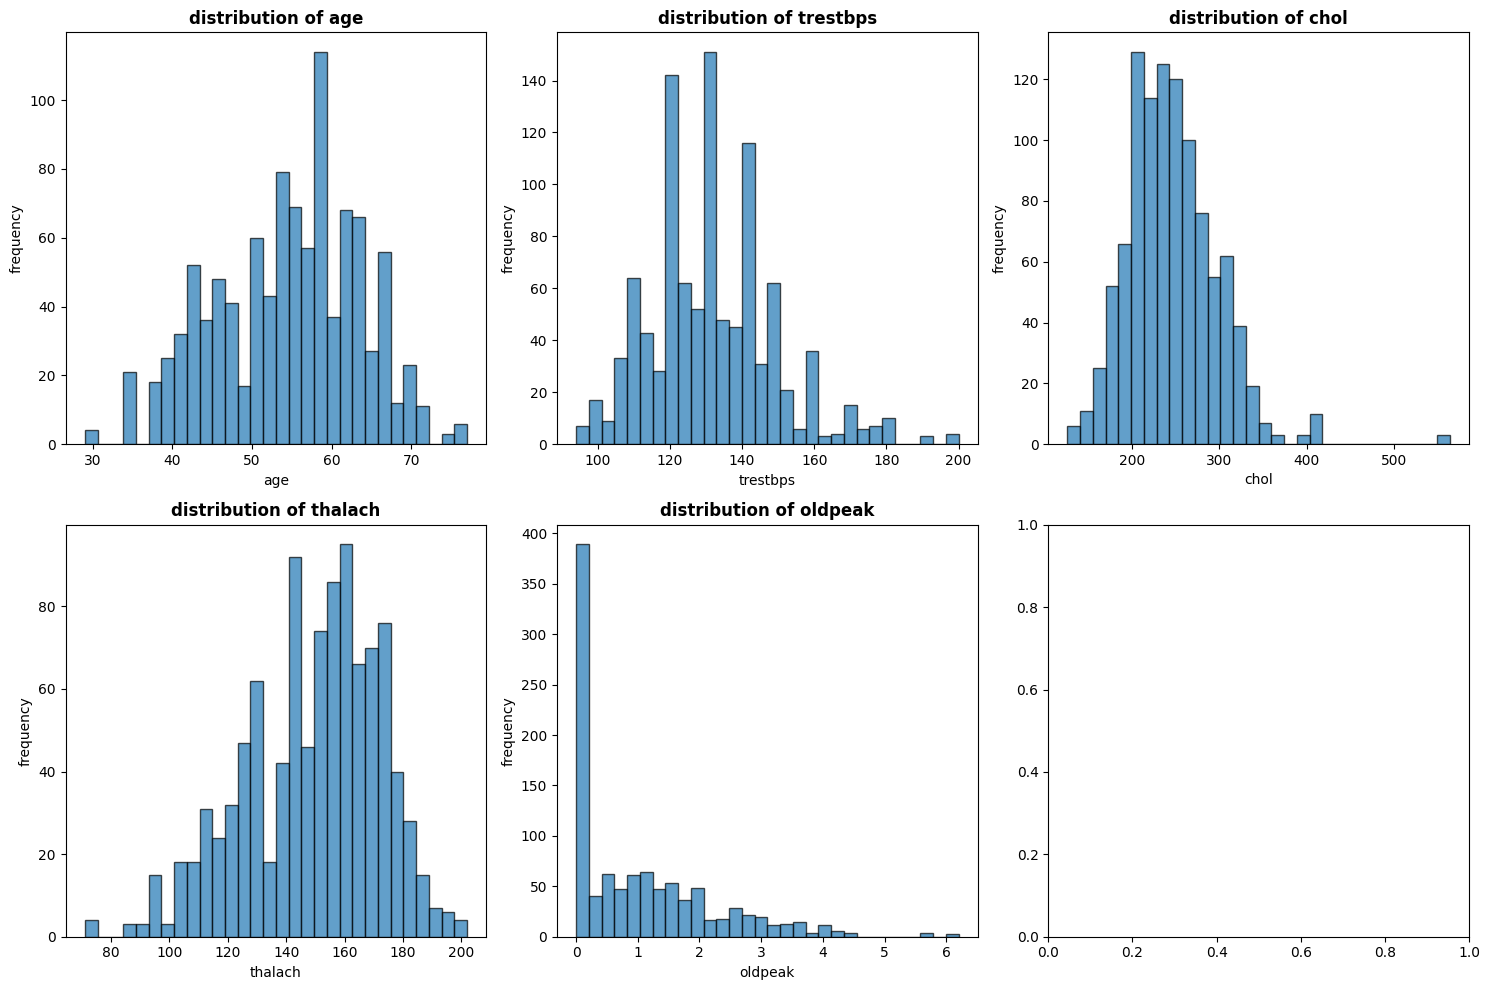

In [14]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('frequency')

plt.tight_layout()
plt.show()

Numerical features vs `target`

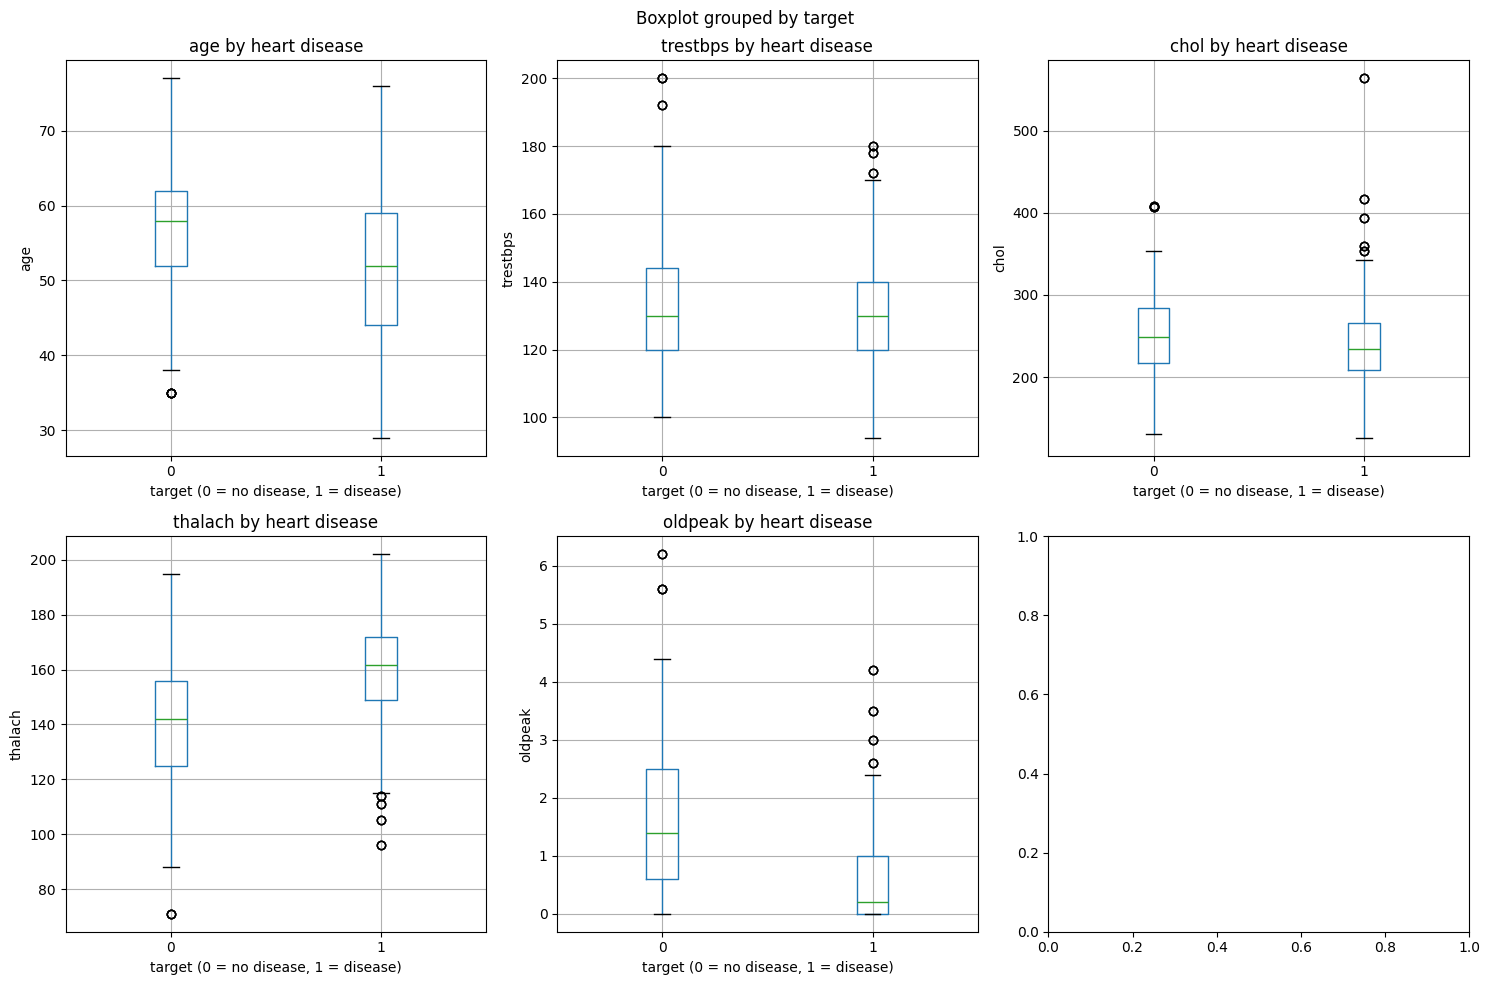

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='target', ax=axes[idx])
    axes[idx].set_title(f'{col} by heart disease')
    axes[idx].set_xlabel('target (0 = no disease, 1 = disease)')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

### Categorical feature analyzis

In [16]:
for col in categorical_cols:
    print(f"\n{col.upper()} - value counts:")
    print(df[col].value_counts().sort_index())
    print("-" * 50)


SEX - value counts:
sex
0    312
1    713
Name: count, dtype: int64
--------------------------------------------------

CP - value counts:
cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64
--------------------------------------------------

FBS - value counts:
fbs
0    872
1    153
Name: count, dtype: int64
--------------------------------------------------

RESTECG - value counts:
restecg
0    497
1    513
2     15
Name: count, dtype: int64
--------------------------------------------------

EXANG - value counts:
exang
0    680
1    345
Name: count, dtype: int64
--------------------------------------------------

SLOPE - value counts:
slope
0     74
1    482
2    469
Name: count, dtype: int64
--------------------------------------------------

CA - value counts:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
--------------------------------------------------

THAL - value counts:
thal
0      7
1     64
2    544
3    410
Name: count, dtype: in

Categorical features distribution by `target`

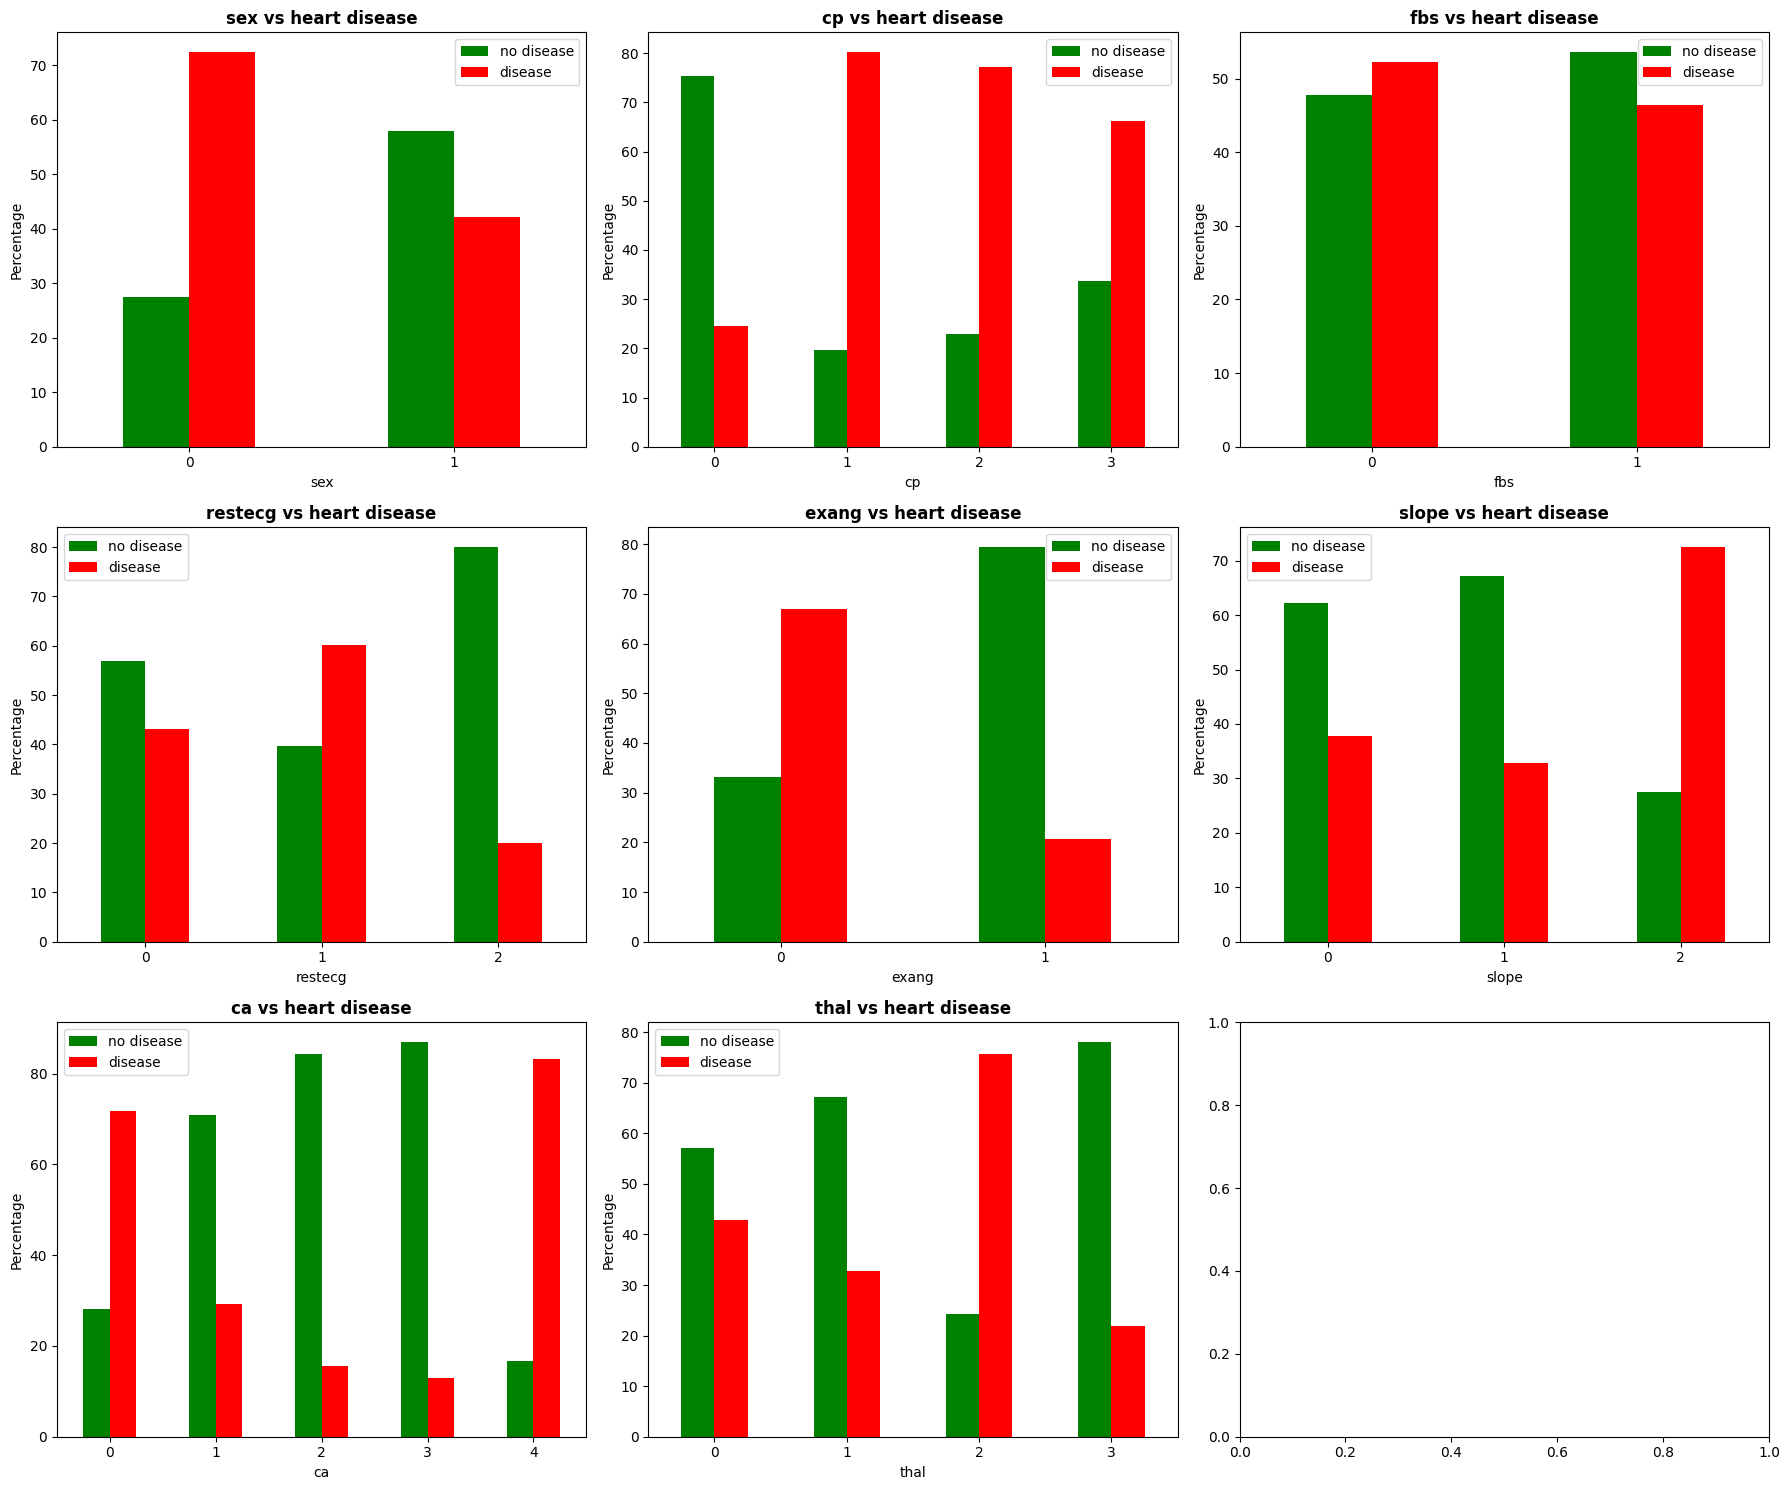

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], stacked=False, color=['green', 'red'])
    axes[idx].set_title(f'{col} vs heart disease', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(['no disease', 'disease'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

#### Feature importance: Mutual information

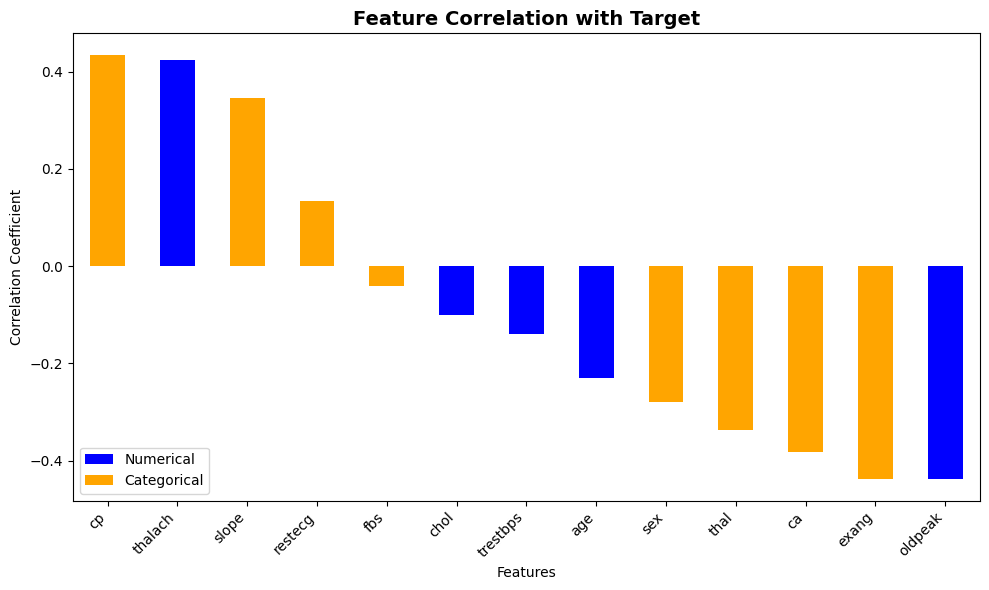

In [18]:
from matplotlib.patches import Patch

# Calculate correlation of all features with the target column
correlations = df.corrwith(df['target']).sort_values(ascending=False)

feature_colors = ['blue' if col in numerical_cols else 'orange' for col in correlations.index]

plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='bar', color=feature_colors[1:])
plt.title('Feature Correlation with Target', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

legend_elements = [
    Patch(facecolor='blue', label='Numerical'),
    Patch(facecolor='orange', label='Categorical')
]
plt.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import mutual_info_score

def mutual_info_target_score(series):
    return mutual_info_score(series, df['target'])

mi_categorical = df[categorical_cols].apply(mutual_info_target_score)
print("mutual_info_score (categorical):")
print(mi_categorical.sort_values(ascending=False))

from sklearn.feature_selection import mutual_info_classif
print("")
mi_numerical = mutual_info_classif(df[numerical_cols], df['target'], random_state=1)
mi_numerical_series = pd.Series(mi_numerical, index=numerical_cols)
print("mutual_info_score (numerical):")
print(mi_numerical_series.sort_values(ascending=False))

mutual_info_score (categorical):
cp         0.144510
thal       0.144022
ca         0.133462
exang      0.100565
slope      0.078288
sex        0.040192
restecg    0.017720
fbs        0.000847
dtype: float64

mutual_info_score (numerical):
chol        0.263921
oldpeak     0.199940
thalach     0.142112
age         0.091980
trestbps    0.035868
dtype: float64


In [20]:
from IPython.display import display

global_disease_rate = df['target'].mean()

print(f"Global heart disease rate: {global_disease_rate:.3f}\n")

for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Feature: {col.upper()}")
    print('='*60)
    
    df_group = df.groupby(col)['target'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_disease_rate
    df_group['risk_ratio'] = df_group['mean'] / global_disease_rate
    
    df_group = df_group.sort_values('risk_ratio', ascending=False)
    display(df_group)
    
    print(f"\nInterpretation:")
    print(f"- Risk ratio > 1: Higher risk than average")
    print(f"- Risk ratio < 1: Lower risk than average")

Global heart disease rate: 0.513


Feature: SEX


,mean,count,diff,risk_ratio
sex,,,,
0,0.724359,312,0.211188,1.411536
1,0.420757,713,-0.092413,0.819917



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: CP


,mean,count,diff,risk_ratio
cp,,,,
1,0.802395,167,0.289224,1.563603
2,0.771127,284,0.257956,1.502671
3,0.662338,77,0.149167,1.290677
0,0.245473,497,-0.267698,0.478345



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: FBS


,mean,count,diff,risk_ratio
fbs,,,,
0,0.521789,872,0.008618,1.016794
1,0.464052,153,-0.049118,0.904284



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: RESTECG


,mean,count,diff,risk_ratio
restecg,,,,
1,0.602339,513,0.089168,1.173760
0,0.430584,497,-0.082587,0.839065
2,0.200000,15,-0.313171,0.389734



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: EXANG


,mean,count,diff,risk_ratio
exang,,,,
0,0.669118,680,0.155947,1.303889
1,0.205797,345,-0.307374,0.401030



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: SLOPE


,mean,count,diff,risk_ratio
slope,,,,
2,0.724947,469,0.211776,1.412681
0,0.378378,74,-0.134792,0.737334
1,0.327801,482,-0.185370,0.638775



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: CA


,mean,count,diff,risk_ratio
ca,,,,
4,0.833333,18,0.320163,1.623891
0,0.717993,578,0.204822,1.399131
1,0.292035,226,-0.221135,0.569080
2,0.156716,134,-0.356454,0.305388
3,0.130435,69,-0.382736,0.254174



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average

Feature: THAL


,mean,count,diff,risk_ratio
thal,,,,
2,0.757353,544,0.244182,1.475830
0,0.428571,7,-0.084599,0.835144
1,0.328125,64,-0.185046,0.639407
3,0.219512,410,-0.293659,0.427757



Interpretation:
- Risk ratio > 1: Higher risk than average
- Risk ratio < 1: Lower risk than average


### Feature Importance Summary

Based on analysis using correlation, mutual information, and risk ratios, the most important features for predicting heart disease:

1. `cp` (Chest Pain Type)
2. `thalach` (Max Heart Rate)
3. `ca` (Number of Major Vessels)
4. `oldpeak` (ST Depression)
5. `thal` (Thalassemia)

## Setting up the validation framework

In [21]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print(f"Full dataset size: {len(df)}")
print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Full dataset size: 1025
Train set size: 615
Validation set size: 205
Test set size: 205


In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [24]:
## One-hot encoding

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

print(f"Training matrix shape: {X_train.shape}")
print(f"Validation matrix shape: {X_val.shape}")
print(f"Number of features: {len(dv.get_feature_names_out())}")

Training matrix shape: (615, 13)
Validation matrix shape: (205, 13)
Number of features: 13


## Train Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Intercept (w0): {model.intercept_[0]:.3f}")
print(f"Number of coefficients: {len(model.coef_[0])}")

Model trained successfully!
Intercept (w0): 0.723
Number of coefficients: 13


### Model Evaluation

In [26]:
y_pred = model.predict_proba(X_val)[:, 1]
disease_decision = (y_pred >= 0.65)
accuracy = (y_val == disease_decision).mean()
print(f"Validation Accuracy: {accuracy:.1%}")

Validation Accuracy: 82.9%


In [27]:
## Threshold Analysis

from sklearn.metrics import accuracy_score

# Test different thresholds
thresholds = np.linspace(0, 1, 21)
accuracies = []

print("Threshold | Accuracy")

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print(f'{t:.2f} | {acc:.3f} ')

print(f"\nBest accuracy: {max(accuracies):.3f}")
print(f"Best threshold: {thresholds[np.argmax(accuracies)]:.2f}")

Threshold | Accuracy
0.00 | 0.478 
0.05 | 0.663 
0.10 | 0.722 
0.15 | 0.737 
0.20 | 0.732 
0.25 | 0.780 
0.30 | 0.805 
0.35 | 0.815 
0.40 | 0.815 
0.45 | 0.824 
0.50 | 0.815 
0.55 | 0.820 
0.60 | 0.824 
0.65 | 0.829 
0.70 | 0.810 
0.75 | 0.815 
0.80 | 0.795 
0.85 | 0.751 
0.90 | 0.707 
0.95 | 0.639 
1.00 | 0.522 

Best accuracy: 0.829
Best threshold: 0.65


In [28]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = disease_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

print("\nFirst 10 rows:")
display(df_pred.head(10))

print(f"\nOverall accuracy: {df_pred.correct.mean():.1%}")


First 10 rows:


,probability,prediction,actual,correct
0,0.637327,0,1,False
1,0.732903,1,0,False
2,0.818306,1,1,True
3,0.995555,1,1,True
4,0.735079,1,1,True
5,0.346190,0,0,True
6,0.864267,1,1,True
7,0.952787,1,1,True
8,0.016348,0,0,True
9,0.161557,0,0,True



Overall accuracy: 82.9%


In [29]:
# confusion matrix
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.65
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

print("Confusion Matrix:")
print(confusion_matrix)
print("\nNormalized:")
print((confusion_matrix / confusion_matrix.sum()).round(3))

Confusion Matrix:
[[90 17]
 [18 80]]

Normalized:
[[0.439 0.083]
 [0.088 0.39 ]]


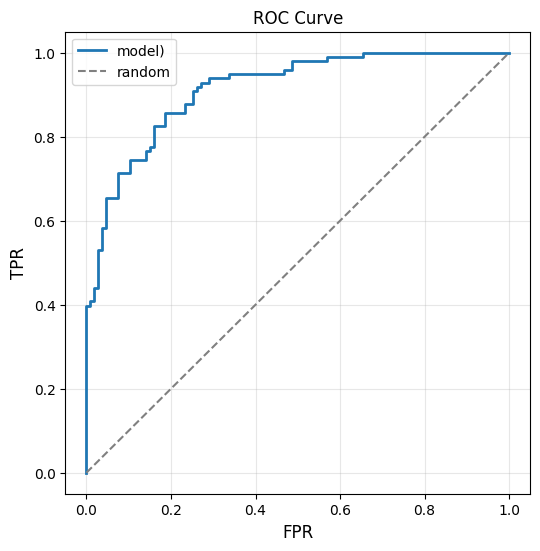

Score: 0.9141


In [30]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'model)', linewidth=2)
plt.plot([0, 1], [0, 1], label='random', linestyle='--', color='gray')
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

auc_score = roc_auc_score(y_val, y_pred)
print(f"Score: {auc_score:.4f}")

Parameter tuning with cross-validation

In [31]:
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [32]:
# Test different C values
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_fold = df_full_train.iloc[train_idx]
        df_val_fold = df_full_train.iloc[val_idx]
        
        y_train_fold = df_train_fold.target.values
        y_val_fold = df_val_fold.target.values
        
        dv, model = train(df_train_fold, y_train_fold, C=C)
        y_pred_fold = predict(df_val_fold, dv, model)
        
        auc = roc_auc_score(y_val_fold, y_pred_fold)
        scores.append(auc)
    
    print(f'C={C:>5} | AUC: {np.mean(scores):.3f} ± {np.std(scores):.3f}')

C=0.001 | AUC: 0.801 ± 0.021
C= 0.01 | AUC: 0.890 ± 0.025
C=  0.1 | AUC: 0.914 ± 0.027
C=  0.5 | AUC: 0.916 ± 0.026
C=    1 | AUC: 0.916 ± 0.026
C=    5 | AUC: 0.917 ± 0.026
C=   10 | AUC: 0.917 ± 0.026


In [33]:
## Train Final Model 

best_C = 1.0  

dv_final, model_final = train(df_full_train, df_full_train.target.values, C=best_C)
y_pred_test = predict(df_test, dv_final, model_final)

auc_test = roc_auc_score(y_test, y_pred_test)
print(f'\nAUC: {auc_test:.4f}')


AUC: 0.9167


## Train Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

def train_rf(df_train, y_train, n_estimators=100, max_depth=10, min_samples_leaf=1):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=1,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    
    return dv, model

def predict_rf(df, dv, model):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

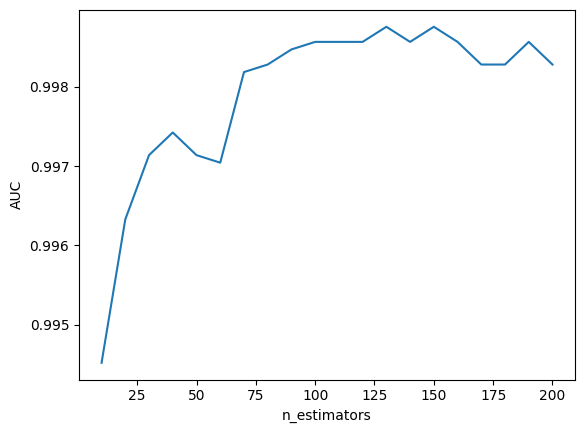

In [35]:
### Tune n_estimators

scores = []

for n in range(10, 201, 10):
    dv_temp, rf = train_rf(df_train, y_train, n_estimators=n)
    # dv_temp = train_rf(df_train, y_train, n_estimators=n)[0]
    y_pred = predict_rf(df_val, dv_temp, rf)
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

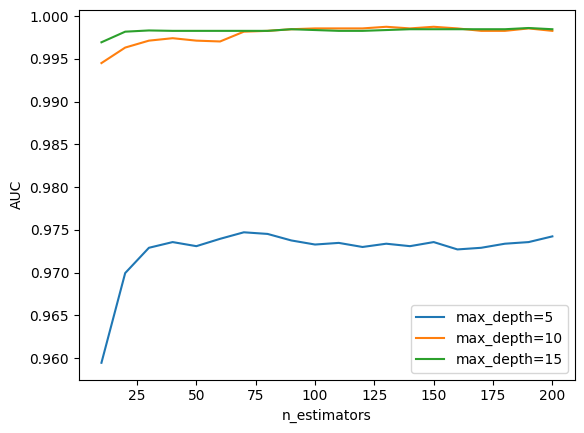

In [36]:
### Tune max_depth

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        dv, rf = train_rf(df_train, y_train, n_estimators=n, max_depth=d)
        y_pred = predict_rf(df_val, dv, rf)
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')

plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

In [37]:
max_depth=5

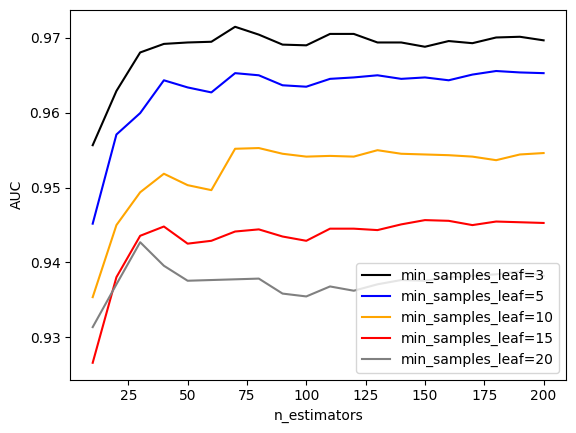

In [38]:
### Tune min_samples_leaf

scores = []

for s in [3, 5, 10, 15, 20]:
    for n in range(10, 201, 10):
        dv, rf = train_rf(df_train, y_train, n_estimators=n, max_depth=max_depth, min_samples_leaf=s)
        y_pred = predict_rf(df_val, dv, rf)
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((s, n, auc))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

colors = ['black', 'blue', 'orange', 'red', 'grey']
for s, col in zip([3, 5, 10, 15, 20], colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color=col, label=f'min_samples_leaf={s}')

plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

In [39]:
min_samples_leaf=3

In [40]:
### Final Random Forest Model 

df_full_train_clean = df_full_train.reset_index(drop=True)
y_full_train = df_full_train_clean.target.values
del df_full_train_clean['target']

# Now train without the target column
dv_rf, rf = train_rf(df_full_train_clean, y_full_train, 
                     n_estimators=75, 
                     max_depth=max_depth, 
                     min_samples_leaf=min_samples_leaf)

y_pred = predict_rf(df_test, dv_rf, rf)
auc_rf = roc_auc_score(y_test, y_pred)

print(f'Random Forest AUC: {auc_rf:.4f}')

Random Forest AUC: 0.9881


In [41]:
### Final Model Training and Comparison

df_full_train_clean = df_full_train.copy().reset_index(drop=True)
y_full_train = df_full_train_clean.target.values
del df_full_train_clean['target']

dv_rf, rf = train_rf(df_full_train_clean, y_full_train, 
                     n_estimators=75, 
                     max_depth=5, 
                     min_samples_leaf=3)

y_pred_rf = predict_rf(df_test, dv_rf, rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("FINAL MODEL COMPARISON ON TEST SET")
print("="*50)
print(f'Logistic Regression AUC: {auc_test:.4f}')
print(f'Random Forest AUC:       {auc_rf:.4f}')
print("="*50)



FINAL MODEL COMPARISON ON TEST SET
Logistic Regression AUC: 0.9167
Random Forest AUC:       0.9881


## Model Selection Summary

### Performance Comparison

After comprehensive experimentation and evaluation on the test set, we compared two models:

```
==================================================
FINAL MODEL COMPARISON ON TEST SET
==================================================
Logistic Regression AUC: 0.9167
Random Forest AUC:       0.9881
==================================================
```

### Random Forest Optimal Hyperparameters

Through systematic hyperparameter tuning using validation data:
- **n_estimators**: 75 (balance between performance and computational efficiency)
- **max_depth**: 5 (prevents overfitting while capturing important patterns)
- **min_samples_leaf**: 3 (balances model complexity and generalization)
- **random_state**: 1 

The Random Forest model with optimized hyperparameters will be implemented in [train.py] for production training and deployment. The model will be saved as `model.pkl` for use in the heart disease prediction service.